In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline

In [2]:
consumer_data =  pd.read_csv('complaints_dec_2014.csv')

In [3]:
consumer_data.head(1)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN


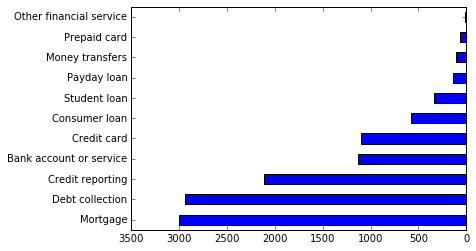

In [4]:
consumer_data['Product'].value_counts().plot('barh').invert_xaxis()
plt.show()

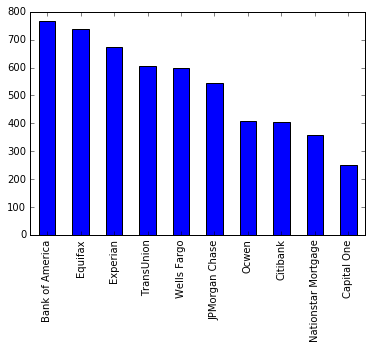

In [5]:
consumer_data['Company'].value_counts().head(10).plot('bar')
plt.show()

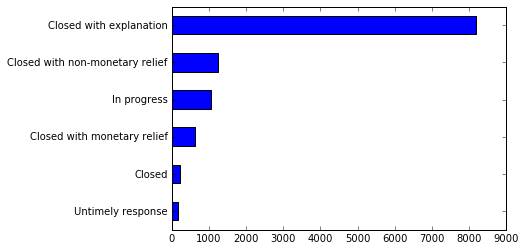

In [6]:
consumer_data['Company response'].value_counts().plot('barh').invert_yaxis()
plt.show()

In [7]:
dates = consumer_data['Date received'].value_counts()

In [12]:
dates

12/04/2014    571
12/10/2014    570
12/30/2014    550
12/17/2014    539
12/22/2014    537
12/29/2014    532
12/18/2014    527
12/08/2014    526
12/02/2014    516
12/16/2014    510
12/09/2014    503
12/23/2014    501
12/03/2014    494
12/11/2014    484
12/15/2014    475
12/01/2014    474
12/12/2014    428
12/05/2014    426
12/31/2014    371
12/19/2014    363
12/24/2014    315
12/26/2014    229
12/28/2014    164
12/20/2014    148
12/06/2014    147
12/13/2014    144
12/14/2014    130
12/07/2014    117
12/27/2014    104
12/21/2014     96
12/25/2014     52
Name: Date received, dtype: int64

In [10]:
complaints_by_product = consumer_data[['Date received','Complaint ID']].copy()
cbp = complaints_by_product.rename(columns={'Complaint ID': 'ID'}).copy()
cbp.index = pd.to_datetime(cbp["Date received"], format='%m/%d/%Y')
cbp['days_of_week'] = cbp.index.to_series().map(lambda d: d.weekday())
c = cbp.groupby('days_of_week').size()
c

days_of_week
0    2544
1    2580
2    2289
3    1634
4    1446
5     543
6     507
dtype: int64